## **Evaluation metrics**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

rand_state = 1234

In [2]:
from sklearn import metrics

In [4]:
dataset = datasets.load_wine()

y = dataset['target']
x = dataset['data']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=rand_state)
for train_idx, test_idx, in sss.split(x, y):
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

model = linear_model.LogisticRegression(penalty='l2')
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [5]:
# Multi-class classification
y_test_pred = model.predict(scaler.transform(x_test))
y_test_pred

array([1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0])

In [6]:
# Accuracy
metrics.accuracy_score(y_test, y_test_pred)

0.9444444444444444

In [ ]:
# Confusion matrix
metrics.confusion_matrix(y_test, y_test_pred)
# Row = actual, Col = predicted

array([[24,  0,  0],
       [ 3, 25,  1],
       [ 0,  0, 19]])

In [ ]:
# Precision, Recall, F1, support; support = #samples in each class
metrics.precision_recall_fscore_support(y_test, y_test_pred)
# Row 0 = precision, recall, f1 of class 0
# Last row = support

(array([0.88888889, 1.        , 0.95      ]),
 array([1.        , 0.86206897, 1.        ]),
 array([0.94117647, 0.92592593, 0.97435897]),
 array([24, 29, 19]))

Text(0, 0.5, 'Precision')

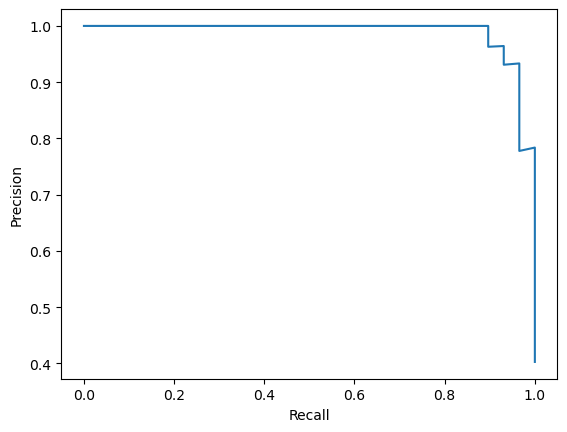

In [23]:
# Precision-recall curve
y_test_pred_prob = model.predict_proba(scaler.transform(x_test))
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test==1, y_test_pred_prob[:, 1])
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

Text(0, 0.5, 'TPR')

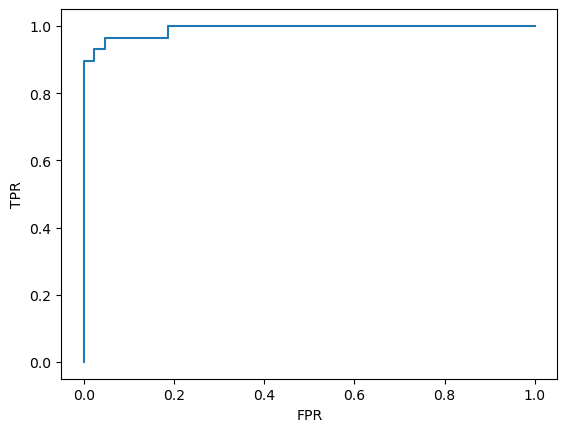

In [24]:
# ROC curve
auc = metrics.roc_auc_score(y_test==1, y_test_pred_prob[:, 1])
fpr, tpr, thresholds = metrics.roc_curve(y_test==1, y_test_pred_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

### **By Hand**

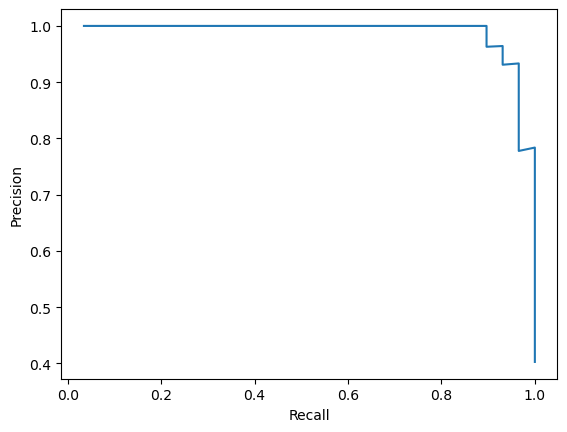

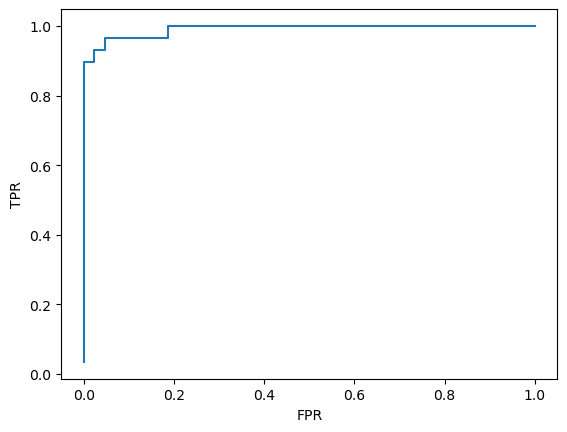

In [48]:
a = y_test_pred_prob[:, 1].argsort()
a = a[::-1]
prob = y_test_pred_prob[:, 1][a]
actual = y_test[a]==1
pos = sum(actual)
neg = sum([1 if e==0 else 0 for e in actual])
precisions = []
recalls = []
fpr = []
for i in range(len(y_test)):
    precisions.append(sum(actual[:i+1])/(i+1))
    recalls.append(sum(actual[:i+1])/pos)
    fpr.append(sum([1 if e==0 else 0 for e in actual[:i+1]])/neg)

plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

plt.plot(fpr, recalls)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()